In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ОТСЮДА НЕ НАДО ЗАПУСКАТЬ
data = pd.read_csv('status_2021.csv', names=['date', 'user', 'task', 'lang', 'result', 'test', 'time', 'memory'])

In [3]:
langs_ids = {'CPP': 'C++', 'PY': 'Python', 'JAVA': 'Java',
             'PP': 'Free Pascal', 'CXX': 'MS C++',
             'PAS': 'PascalABC', 'CS': 'C#',
             'PYPY': 'PyPy', 'DPR': 'Delphi',
             'GO': 'Go', 'BAS': 'Basic'}
data.lang.replace(langs_ids, inplace=True)

In [4]:
popular_langs = data.lang.value_counts()

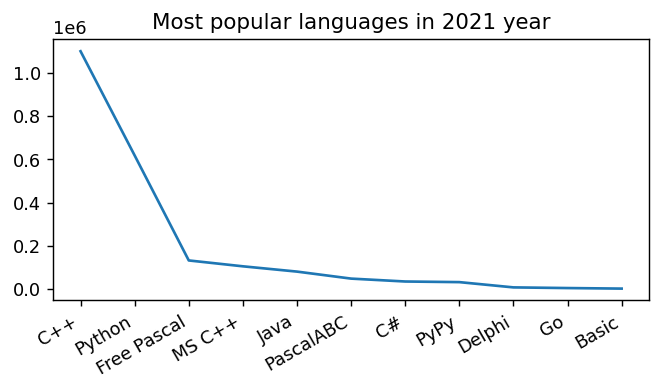

In [5]:
fig = plt.figure(dpi=128, figsize=(6, 3))
plt.plot(popular_langs)

plt.title('Most popular languages in 2021 year')
fig.autofmt_xdate()

plt.show()

In [6]:
def analiz(years: list[int]):
    fig, ax = plt.subplots(figsize=(15, 9))
    fig.dpi = 128
    for year in years:
        data = pd.read_csv(f'status_{year}.csv', names=['date', 'user', 'task', 'lang',
                                                        'result', 'test', 'time', 'memory'])
        langs_ids = {'CPP': 'C++', 'PY': 'Python', 'JAVA': 'Java',
                 'PP': 'Free Pascal', 'CXX': 'MS C++',
                 'PAS': 'PascalABC', 'CS': 'C#',
                 'PYPY': 'PyPy', 'DPR': 'Delphi',
                 'GO': 'Go', 'BAS': 'Basic'}
        data.lang.replace(langs_ids, inplace=True)
        popular_langs = data.lang.value_counts()

        ax.plot(popular_langs, label=str(year))

        leg = ax.legend()

        plt.title(f'Most popular languages in {years} years', fontsize=24)
        plt.tick_params(labelsize=14)
        
        fig.autofmt_xdate()

    plt.show()
# ДОСЮДА

In [2]:
langs_ids = {'CPP': 'C++', 'PY': 'Python', 'PP': 'Pascal',
             'JAVA': 'Java', 'CXX': 'C++',
             'PAS': 'Pascal', 'CS': 'C#',
             'PYPY': 'Python', 'DPR': 'Pascal',
             'GO': 'Go', 'BAS': 'Basic'}
pop_of_langs = {lang: {} for lang in langs_ids.values()}
for year in range(2007, 2023):
    data = pd.read_csv(f'status_{year}.csv', names=['date', 'user', 'task', 'lang',
                                                        'result', 'test', 'time', 'memory'])
    
    data.lang.replace(langs_ids, inplace=True)

    pop = data.lang.value_counts()
    for lang in pop_of_langs:
        if lang in pop:
            pop_of_langs[lang][year] = pop[lang]

In [5]:
data.lang  # ЭТО ТОЖЕ НЕ НУЖНО

14127169       C++
14127168       C++
14127167       C++
14127166    Python
14127165       C++
             ...  
12075240      Java
12075239       C++
12075238       C++
12075237       C++
12075236       C++
Name: lang, Length: 1981630, dtype: object

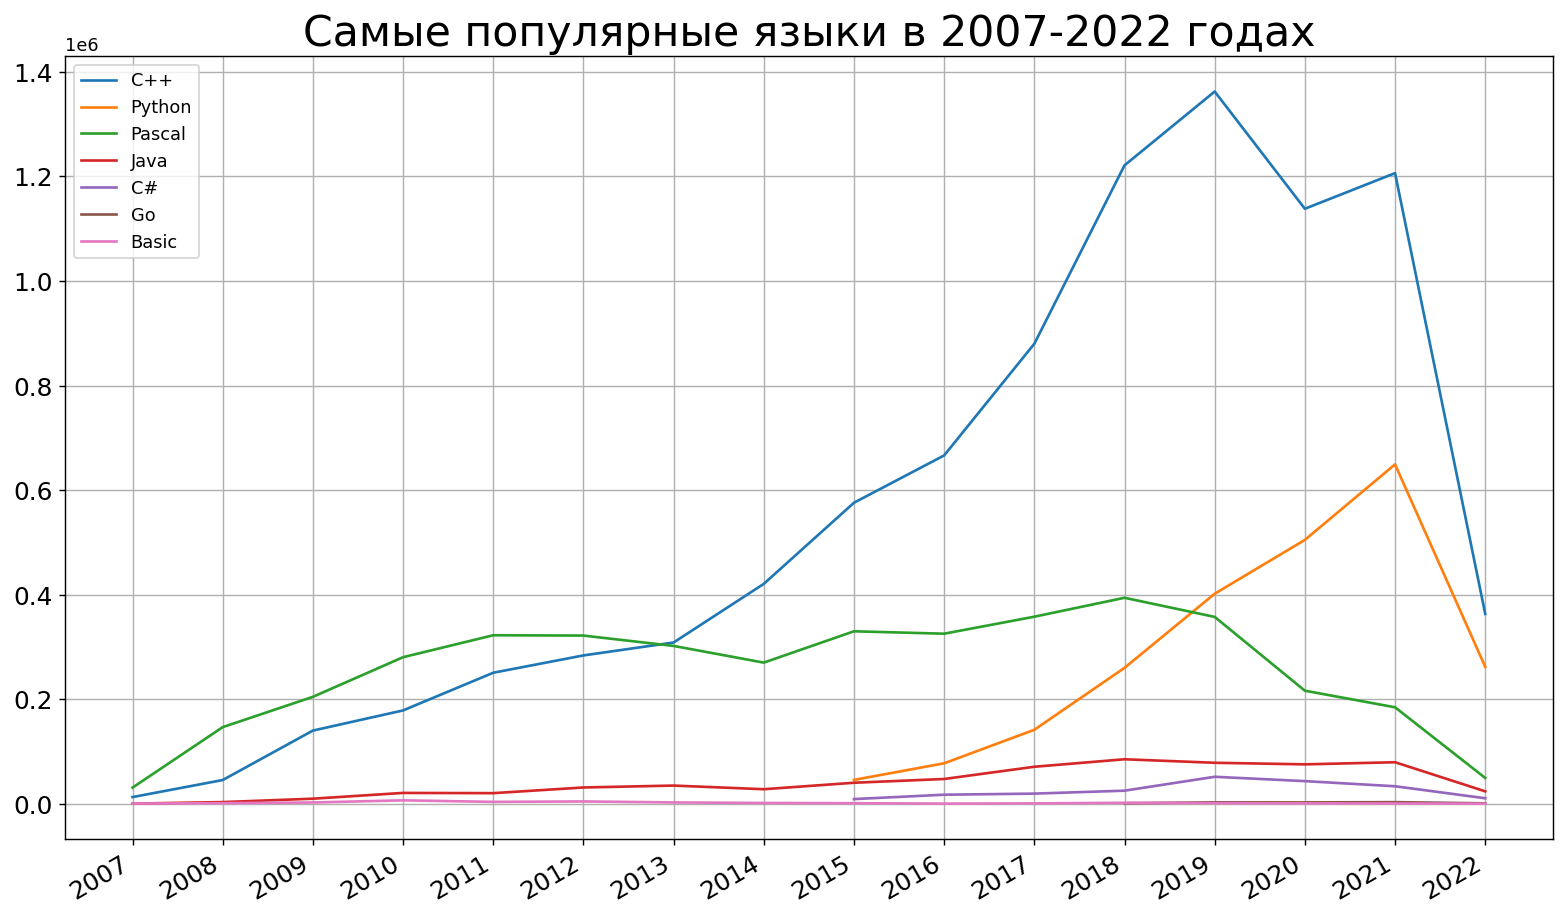

In [4]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.dpi = 128

for lang, year_count in pop_of_langs.items():
    ax.plot(year_count.keys(), year_count.values(), label=lang)

leg = ax.legend(loc='upper left')

ax.set_xticks(range(2007, 2023))

plt.title('Самые популярные языки в 2007-2022 годах', fontsize=24)
plt.tick_params(labelsize=14)

fig.autofmt_xdate()
ax.grid(True)

plt.show()

In [5]:
positions_of_langs = {lang: {} for lang in langs_ids.values()}

for year in range(2007, 2023):
    data = pd.read_csv(f'status_{year}.csv', names=['date', 'user', 'task', 'lang',
                                                    'result', 'test', 'time', 'memory'])
    data.lang.replace(langs_ids, inplace=True)
    
    langs_pop = {lang: data.lang.value_counts()[lang] for lang in langs_ids.values()
                 if lang in data.lang.value_counts()}
    sorted_langs = sorted(langs_pop, key=lambda x: langs_pop[x], reverse=True)
    
    for position, lang in enumerate(sorted_langs, 1):
        positions_of_langs[lang][year] = position


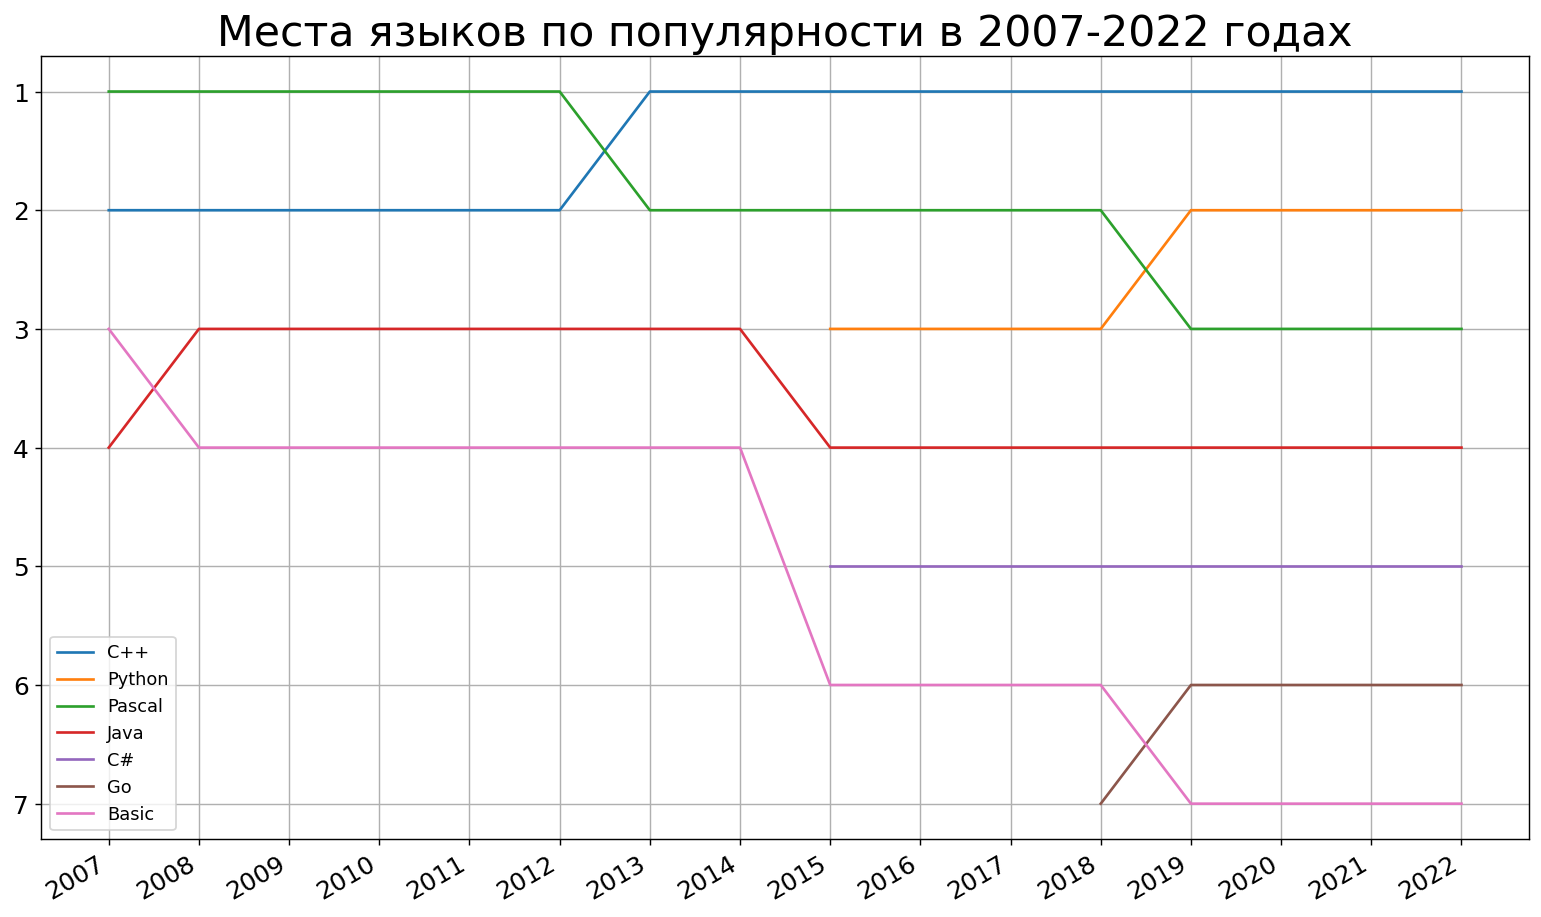

In [6]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.dpi = 128

for lang, year_count in positions_of_langs.items():
    ax.plot(year_count.keys(), year_count.values(), label=lang)

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticks(range(2007, 2023))
leg = ax.legend(loc='lower left')

plt.title('Места языков по популярности в 2007-2022 годах', fontsize=24)
plt.tick_params(labelsize=14)

fig.autofmt_xdate()
ax.grid(True)

plt.show()